# Unsupervised dimensionality reduction via principal component analysis

Principal compoennt analysis(PCA)

In [1]:
import pandas as pd

In [2]:
df_wines = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [5]:
from sklearn.cross_validation import train_test_split

D:\anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from sklearn.preprocessing import StandardScaler

In [9]:
X, y = df_wines.iloc[:, 1:].values, df_wines.iloc[:, 0].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [13]:
sc = StandardScaler()

In [16]:
X_train_std = sc.fit_transform(X_train)

In [17]:
X_test = sc.transform(X_test)

Covariance matrix

In [18]:
import numpy as np

In [19]:
cov_mat = np.cov(X_train_std.T)

In [21]:
cov_mat.shape

(13, 13)

In [22]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [23]:
eigen_vals

array([ 4.8923083 ,  2.46635032,  1.42809973,  1.01233462,  0.84906459,
        0.60181514,  0.52251546,  0.08414846,  0.33051429,  0.29595018,
        0.16831254,  0.21432212,  0.2399553 ])

In [24]:
tot = sum(eigen_vals)

In [28]:
var_exp = sorted(eigen_vals/tot, reverse=True)

In [29]:
cum_var_exp = np.cumsum(var_exp)

In [32]:
import matplotlib.pyplot as plt

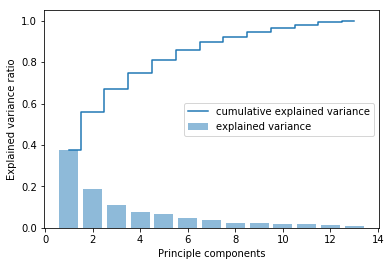

In [61]:
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.5, label='explained variance') # var_exp is an ordinary array , not np array
plt.step(range(1, len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principle components')
plt.legend(loc='best')
plt.show()

Feature transformation

In [64]:
eigen_vecs.shape # each column is an eigenvector

(13, 13)

In [65]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

In [67]:
eigen_pairs.sort(reverse=True)

In [70]:
eigen_pairs[0][1]

array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
        0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
        0.30032535,  0.36821154,  0.29259713])

In [71]:
eigen_pairs[0][1][:, np.newaxis]

array([[ 0.14669811],
       [-0.24224554],
       [-0.02993442],
       [-0.25519002],
       [ 0.12079772],
       [ 0.38934455],
       [ 0.42326486],
       [-0.30634956],
       [ 0.30572219],
       [-0.09869191],
       [ 0.30032535],
       [ 0.36821154],
       [ 0.29259713]])

In [74]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [75]:
w

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [79]:
X_train_pca = X_train_std.dot(w)

In [84]:
X_train_pca[y_train==l]

array([[-2.6372337 ,  2.66488569],
       [-2.52848449,  0.51846618],
       [-2.83057003,  0.41936129],
       [-2.82251879,  1.99763147],
       [-2.28554906, -0.40096658],
       [-2.52924945,  0.6477328 ],
       [-3.59338727,  0.88321901],
       [-1.60406659,  2.40373662],
       [-2.39863877,  2.47524175],
       [-3.13549157, -0.29421321],
       [-3.53069904,  1.79971521],
       [-3.82504747,  0.11741931],
       [-3.44482795,  0.89793105],
       [-2.3761711 ,  2.15480504],
       [-1.26515775,  0.04977931],
       [-3.89082853,  0.54194575],
       [-1.8063292 ,  1.31606219],
       [-2.72256164,  2.15319971],
       [-3.28947263,  2.24576835],
       [-2.27737367,  0.55018386],
       [-2.85178367,  0.15732478],
       [-2.682777  ,  0.33277815],
       [-2.04371299,  0.31389153],
       [-2.32821566,  0.18612349],
       [-2.84540302,  1.94250398],
       [-3.35600644,  1.14127988],
       [-2.94150833,  0.3885073 ],
       [-2.30405629,  2.15027517],
       [-3.49291623,

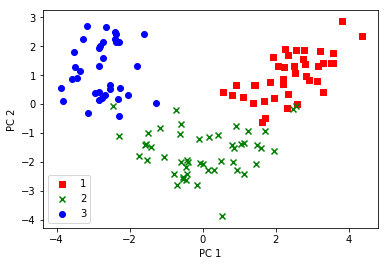

In [86]:
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
for c, l, m in zip(colors, np.unique(y_train), markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m) 
    # warning: not X_train_pca[y_train==l][0]
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()